In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os

## Function to calculate azimuth between 2 points

In [35]:

def calc_az_line(x1,y1,x2,y2,x3,y3):
    v1 = np.array((x3,y3,0)) - np.array((x1,y1,0))
    v2 = np.array((x3,y3,0)) - np.array((x2,y2,0))

    theta = np.arctan2(np.linalg.norm(np.cross(v1,v2)),np.dot(v1,v2))
    if theta < 0:
        theta += 2*np.pi
    return theta


In [36]:
# define some test source locations other than shot A to make sure the orientation factors are correct
source = np.array([647966.931,906144.14])
source1 = np.array([647000.0,905000.00])
source2 = np.array([649000.0,905000.00])
sources = np.array(([647966.931,906144.14],[647000.0,905000.00],[649000.0,905000.00]))
# Read in the DAS stations
stations06 = pd.read_csv('/home/spri902/explosions/shotA_channel_map/H2.csv')
stationsP = pd.read_csv('/home/spri902/explosions/shotA_channel_map/H1.csv')
cols = list(stations06.columns[4:9:2])
stations06 = stations06[cols]
stationsP = stationsP[cols]
stations = pd.concat((stationsP,stations06)) # station order: starts at entrance to P main going back to A cavity
cable = ['H1','H2']
# Channels and distances 
start_chan = np.array((stations.iloc[0,0],stations.iloc[0,1],stations.iloc[0,2])) # first station at entrance to Pmain
last_chan = np.array((stations.iloc[-1,0],stations.iloc[-1,1],stations.iloc[-1,2])) # last station closest to A
doffsets = []
for i in range(len(stations)):
    doffsets.append(np.linalg.norm((start_chan-stations.iloc[i,:])))
doffsets = np.array(doffsets)

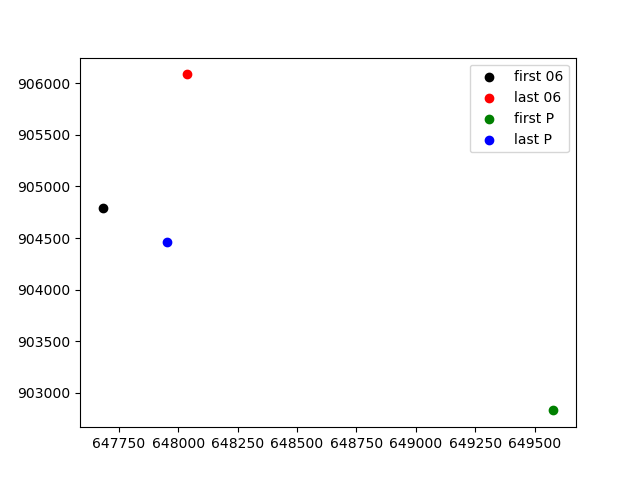

In [30]:
fig,ax = plt.subplots()
ax.scatter(stations06.iloc[0,0],stations06.iloc[0,1],c='black',label='first 06')
ax.scatter(stations06.iloc[-1,0],stations06.iloc[-1,1],c='red',label='last 06')
ax.scatter(stationsP.iloc[0,0],stationsP.iloc[0,1],c='green',label='first P')
ax.scatter(stationsP.iloc[-1,0],stationsP.iloc[-1,1],c='blue',label='last P')
ax.legend()

In [49]:
thetaP = np.zeros((len(stationsP),sources.shape[0]))
theta6 = np.zeros((len(stations06),sources.shape[0]))

for i in np.arange(1,len(stationsP)):
    thetaP[i,0] = calc_az_line(sources[0,0],sources[0,1],stations.iloc[i,0],stations.iloc[i,1],stations.iloc[i-1,0],stations.iloc[i-1,1])
    thetaP[i,1] = calc_az_line(sources[1,0],sources[1,1],stations.iloc[i,0],stations.iloc[i,1],stations.iloc[i-1,0],stations.iloc[i-1,1])
    thetaP[i,2] = calc_az_line(sources[2,0],sources[2,1],stations.iloc[i,0],stations.iloc[i,1],stations.iloc[i-1,0],stations.iloc[i-1,1])
for i in np.arange(1,len(stations06)):
    theta6[i,0] = calc_az_line(sources[0,0],sources[0,1],stations06.iloc[i,0],stations06.iloc[i,1],stations06.iloc[i-1,0],stations06.iloc[i-1,1])
    theta6[i,1] = calc_az_line(sources[1,0],sources[1,1],stations06.iloc[i,0],stations06.iloc[i,1],stations06.iloc[i-1,0],stations06.iloc[i-1,1])
    theta6[i,2] = calc_az_line(sources[2,0],sources[2,1],stations06.iloc[i,0],stations06.iloc[i,1],stations06.iloc[i-1,0],stations06.iloc[i-1,1])
    

radialP = np.cos(thetaP) ** 2
tangentP = np.sin(thetaP) * np.cos(thetaP)
tangentP2 = np.sin(2*thetaP)

radial6 = np.cos(theta6) ** 2
tangent6 = np.sin(theta6) * np.cos(theta6)
tangent62 = np.sin(2*theta6)

radial = np.vstack((radialP,radial6))
tangent = np.vstack((tangentP,tangent6))

tangent2 = np.vstack((tangentP2,tangent62))

/tmp/ipykernel_3671423/2014869035.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax=plt.subplots(2,3,figsize=(16,6))


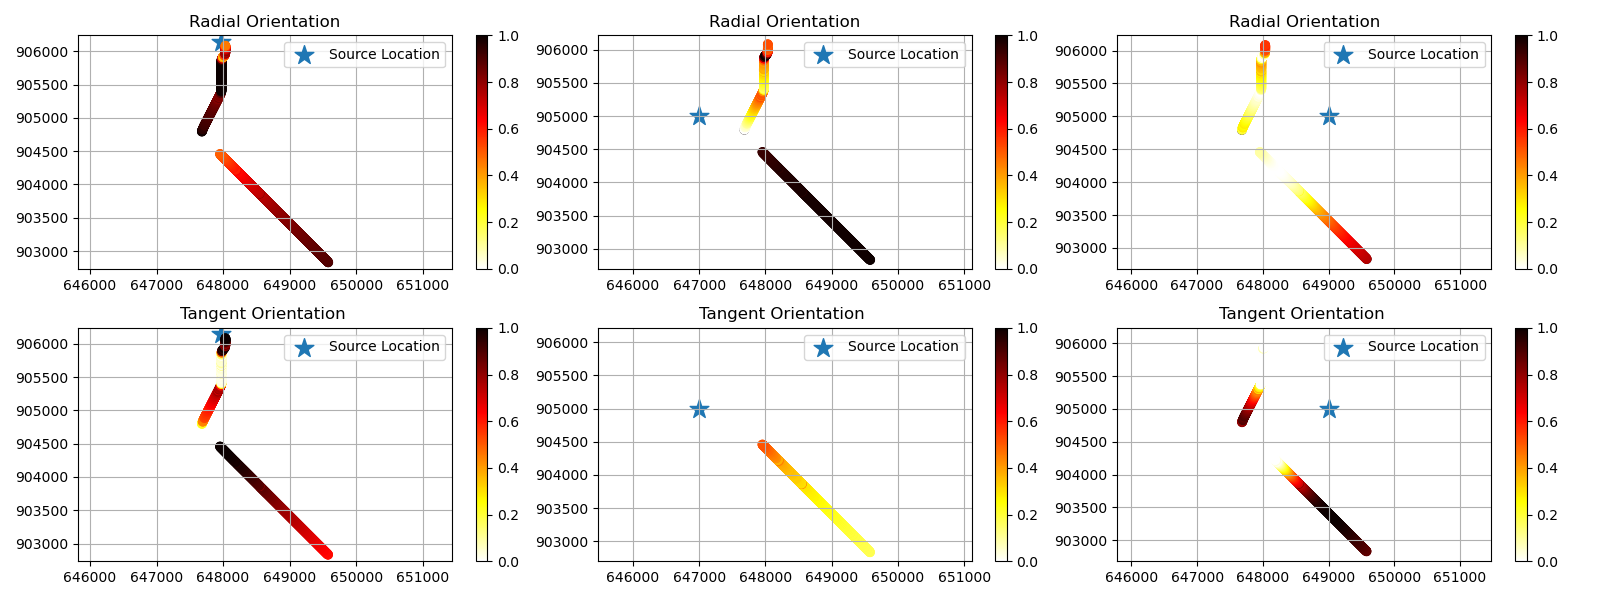

In [51]:
fig,ax=plt.subplots(2,3,figsize=(16,6))
for i in range(3):
    ax[0,i].scatter(sources[i,0],sources[i,1],marker='*',s=200,label='Source Location')
    im=ax[0,i].scatter(stations.iloc[:,0],stations.iloc[:,1],c=radial[:,i],cmap='hot_r',vmin=0,vmax=1)
    ax[0,i].axis('equal')
    ax[0,i].grid('on')
    ax[0,i].legend()
    ax[0,i].set_title('Radial Orientation')
    fig.colorbar(im)
    fig.tight_layout()

    ax[1,i].scatter(sources[i,0],sources[i,1],marker='*',s=200,label='Source Location')
    im=ax[1,i].scatter(stations.iloc[:,0],stations.iloc[:,1],c=tangent2[:,i],cmap='hot_r',vmin=0,vmax=1)
    ax[1,i].axis('equal')
    ax[1,i].grid('on')
    ax[1,i].legend()
    ax[1,i].set_title('Tangent Orientation ')
    fig.colorbar(im)
    fig.tight_layout()

    # ax[2,i].scatter(sources[i,0],sources[i,1],marker='*',s=200,label='Source Location')
    # im=ax[2,i].scatter(stations.iloc[:,0],stations.iloc[:,1],c=tangent2[:,i],cmap='hot_r',vmin=0,vmax=1)
    # ax[2,i].axis('equal')
    # ax[2,i].grid('on')
    # ax[2,i].legend()
    # ax[2,i].set_title('Tangent2 Orientation ')
    # fig.colorbar(im)
    # fig.tight_layout()

In [ ]:
fig,ax = plt.subplots(3,1,sharey=True,figsize=(12,14))
for i in range(3):
    ax[i].barh(doffsets,radial[:,i],color='red',label='Radial')
    ax[i].barh(doffsets,tangent[:,i],color='green',label='Tangent')
    ax[i].set_title(f'Source Location {sources[i]}')
    ax[i].set_xlabel('Orientation Factor')
    ax[i].set_ylabel('Distance along cable (ft)')
    ax[i].legend()

In [ ]:
G = [5,10,15,20,40]
vel = 1000.0
freq = np.arange(0,250,0.5)
R = np.zeros((len(G),len((freq))))
lam = np.zeros(len(freq))
for j in range(len(G)):
    for i in range(len(freq)):
        lam[i] = vel/freq[i]
        R[j,i] = 1/G[j] * np.abs(np.sin((np.pi * G[j]) / lam[i]) / np.pi *lam[i])
        

In [ ]:
fig,ax = plt.subplots()
ax1 = ax.twiny()
freqs = [10,50,100,150,200,249]
wls =[int(lam[np.argwhere(f==freq)[0][0]]) for f in freqs]
for j in range(len(G)):
    ax.plot(freq,20*np.log10(R[j,:]),label=f'GL {G[j]} m')
    # ax1.plot(np.flip(lam),20*np.log10(R[j,:]))
    ax1.set_xlabel('Wavelength')
    ax1.set_xticklabels([str(l) for l in wls])
    ax.set_ylim(-40,0)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude Response (dB)')
    ax.legend()


In [ ]:
wls

In [ ]:
str(wls)

In [ ]:
freq[400]